In [5]:
import os
import xtarfile as tarfile
from six.moves import urllib


In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_path=r"C:\Users\grzeg\Documents\DataScience\Projekt\zestaw_danych\Mieszkania"):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)


In [8]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
type(housing)


pandas.core.frame.DataFrame

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


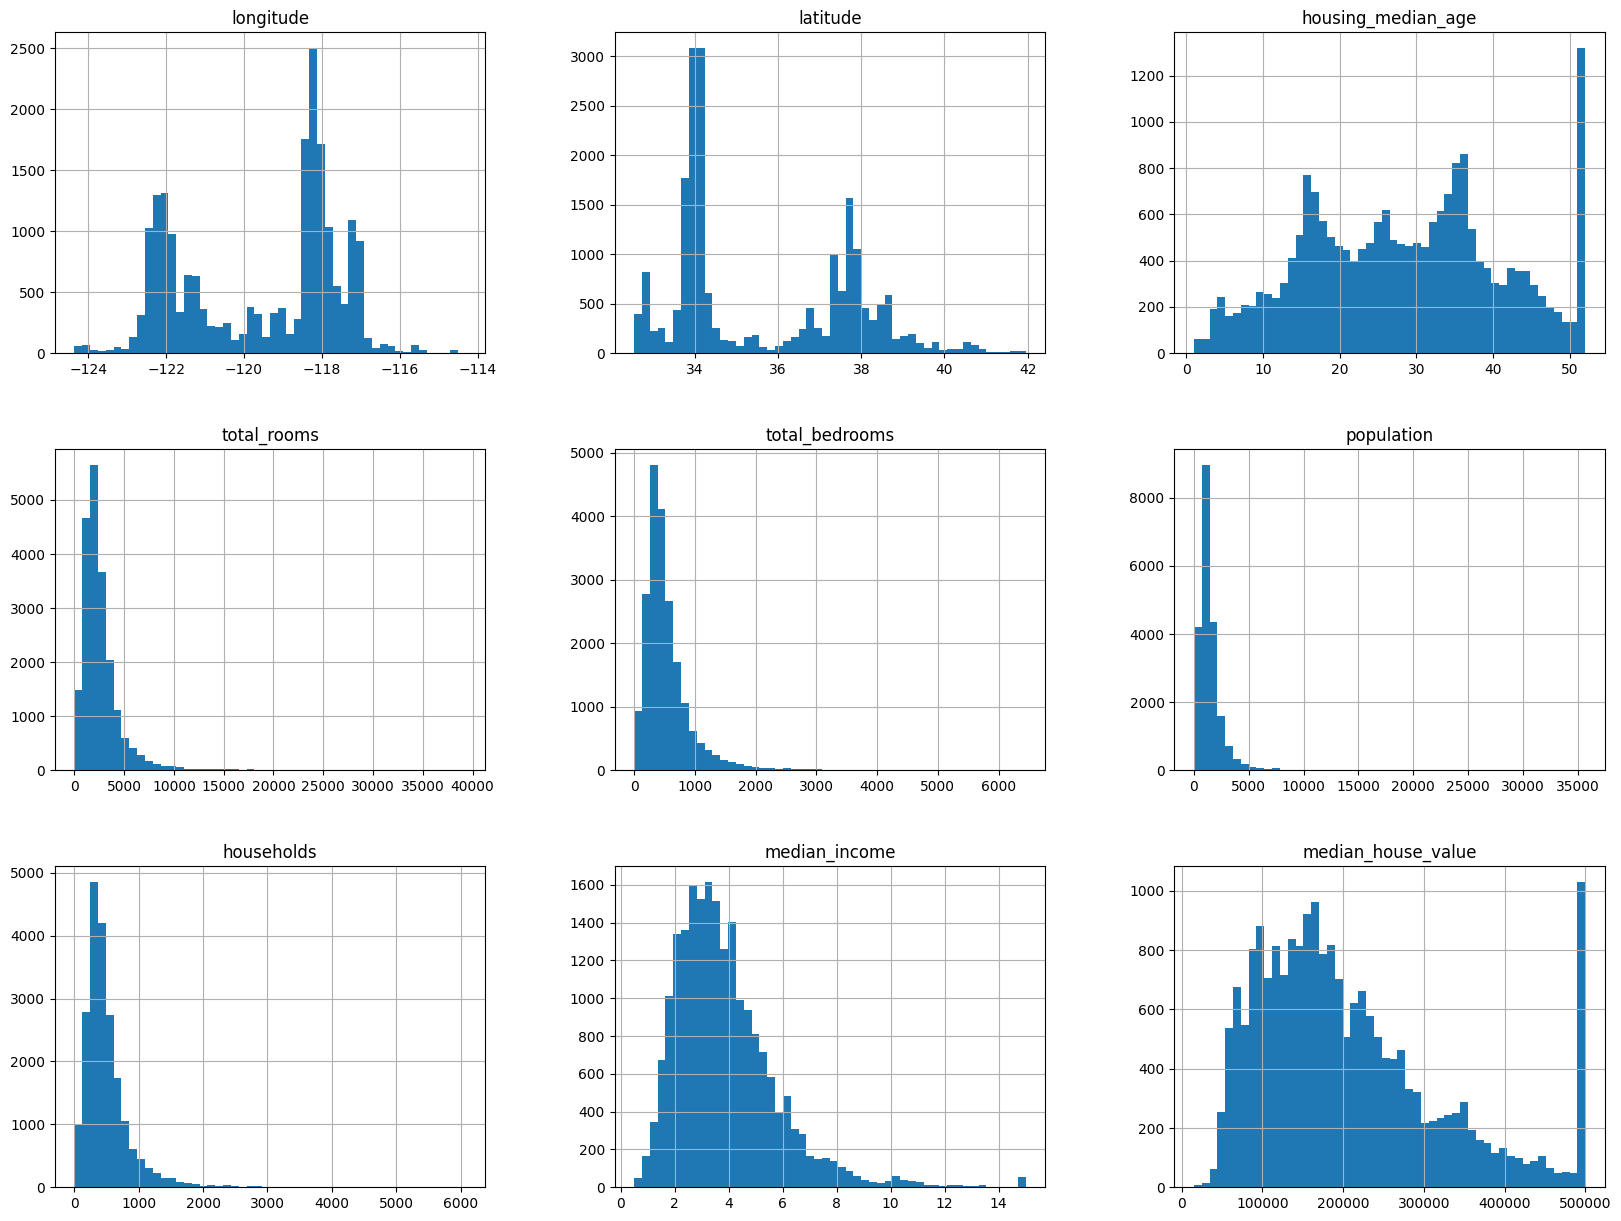

In [13]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set=split_train_test(housing, 0.2)
print('Uczące', len(train_set),"testowe:", len(test_set))

Uczące 16512 testowe: 4128


In [16]:
import hashlib
def test_set_check(indentifier, test_ratio, hash):
    return hash(np.int64(indentifier)).digest()[-1]<256*test_ratio
def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [17]:
housing_with_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_with_id, 0.2,"index")


In [18]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [19]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [20]:
housing["income_cat"]=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)

C:\Users\grzeg\AppData\Local\Temp\ipykernel_5420\2762303884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)


In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'income_cat'}>, <Axes: >, <Axes: >]],
      dtype=object)

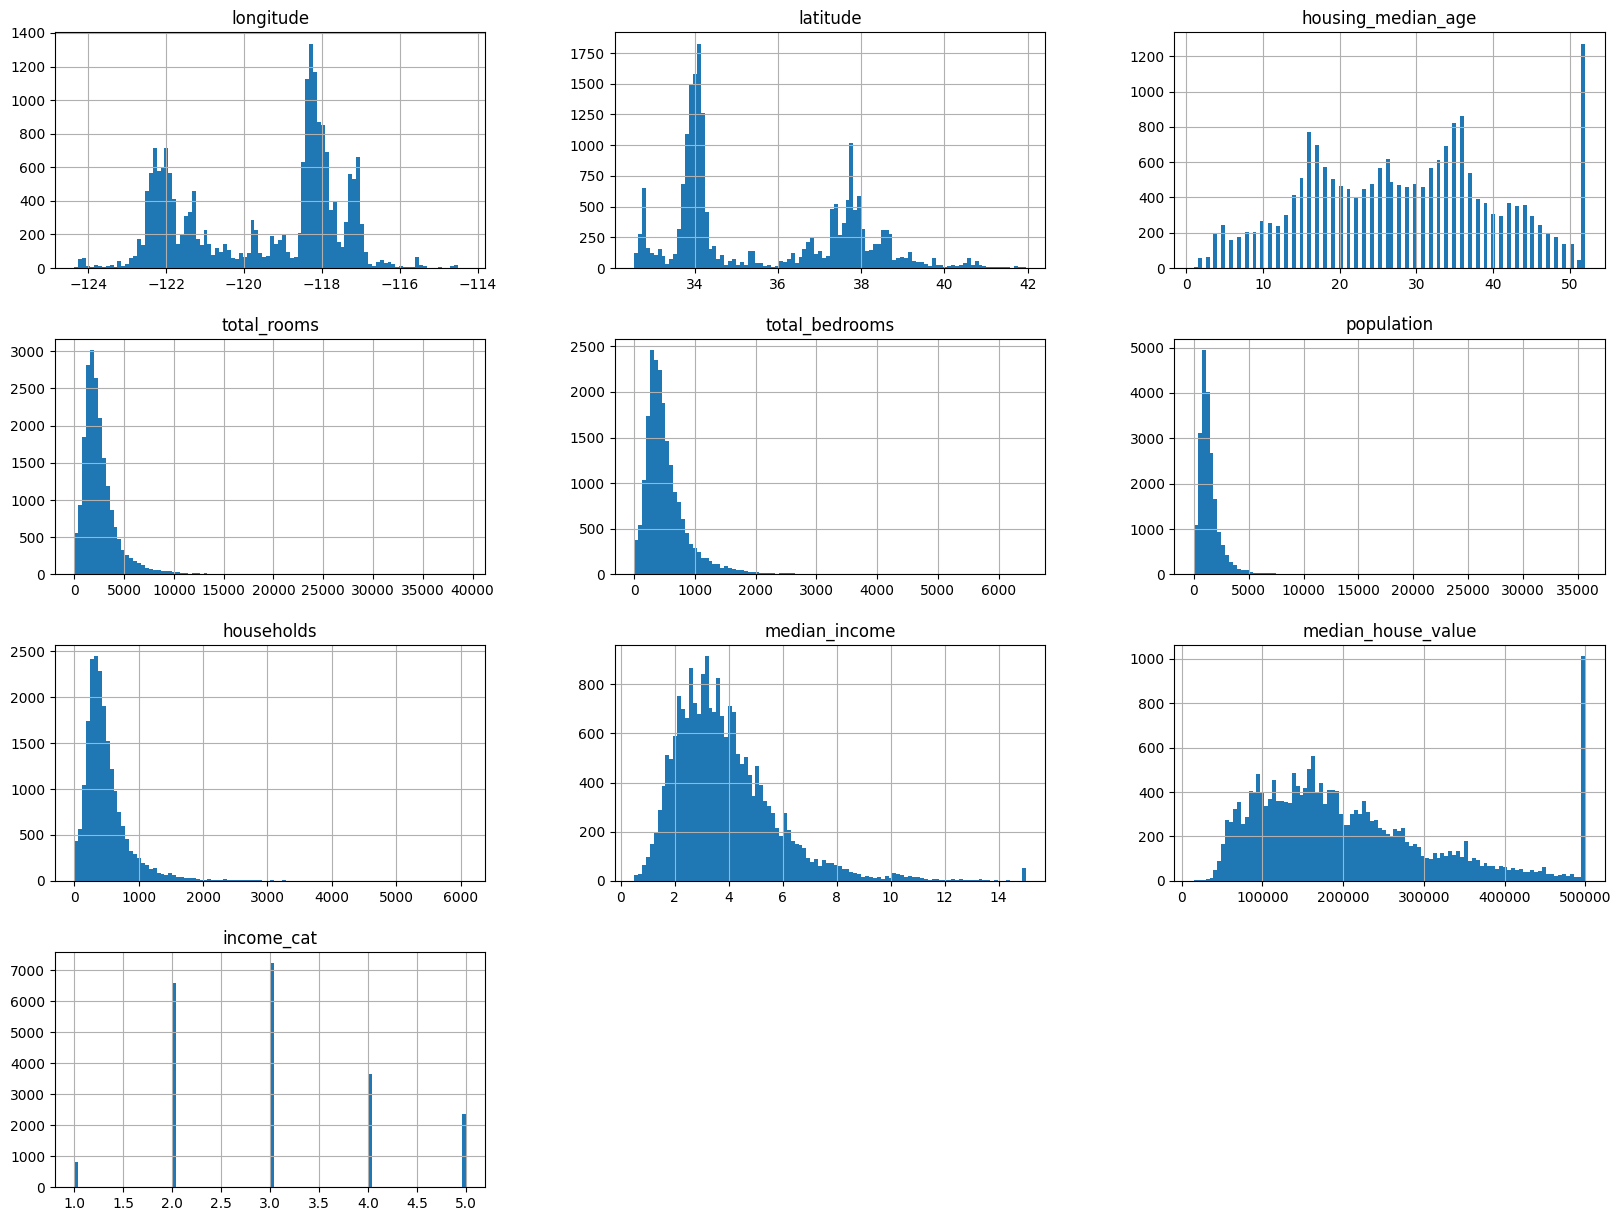

In [22]:
housing.hist(bins=100,figsize=(20,15))

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [25]:
test_index.view()

array([ 5241, 17352,  3505, ..., 17223, 10786,  3965], shape=(4128,))

In [26]:
housing['income_cat'].value_counts()/len(housing)*100

income_cat
3.0    35.058140
2.0    31.884690
4.0    17.630814
5.0    11.443798
1.0     3.982558
Name: count, dtype: float64

In [27]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4.0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3.0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3.0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3.0


In [28]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [29]:
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

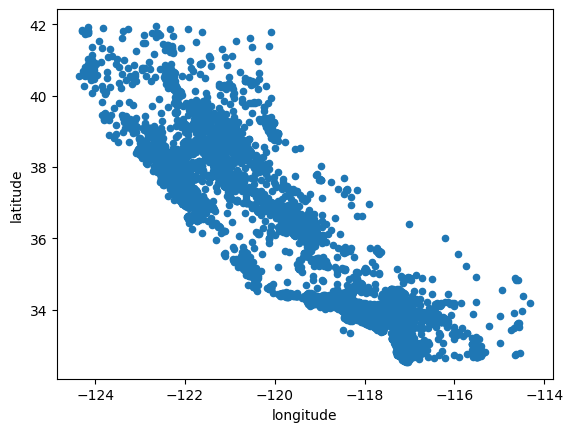

In [30]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

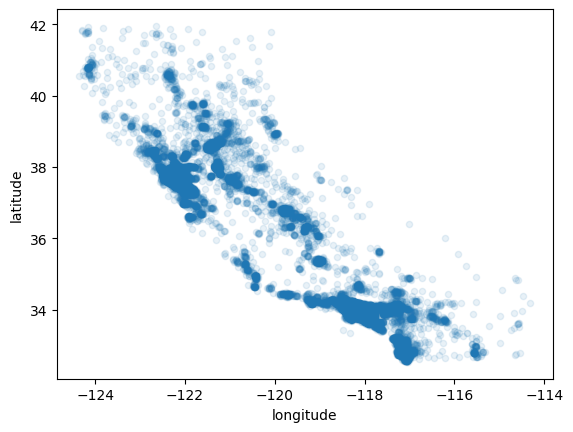

In [31]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,legend=True)

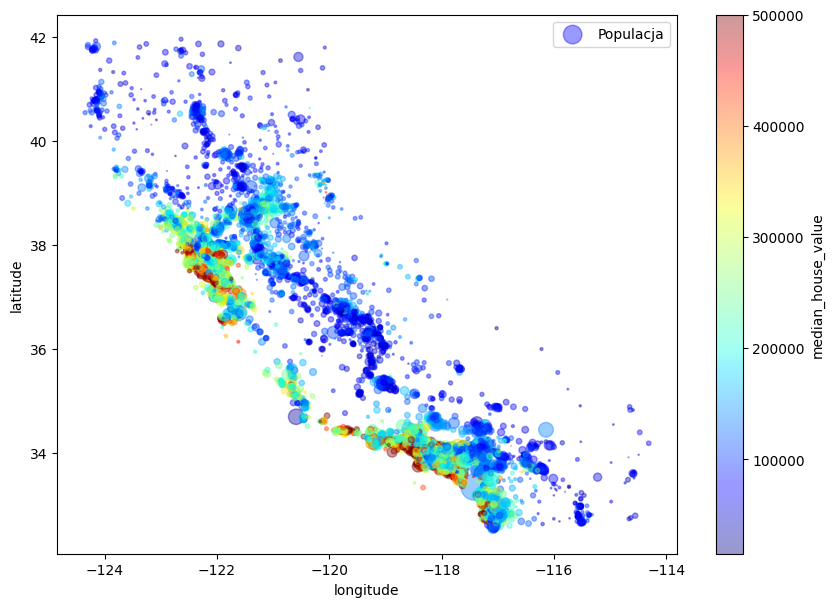

In [32]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100, label='Populacja',figsize=(10,7),
             c="median_house_value",cmap=plt.get_cmap('jet'),colorbar=True
             ,)
plt.legend()

In [33]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

In [34]:
housing=housing.drop('ocean_proximity',axis=1)

In [35]:
corr_matrix=housing.corr()


In [36]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

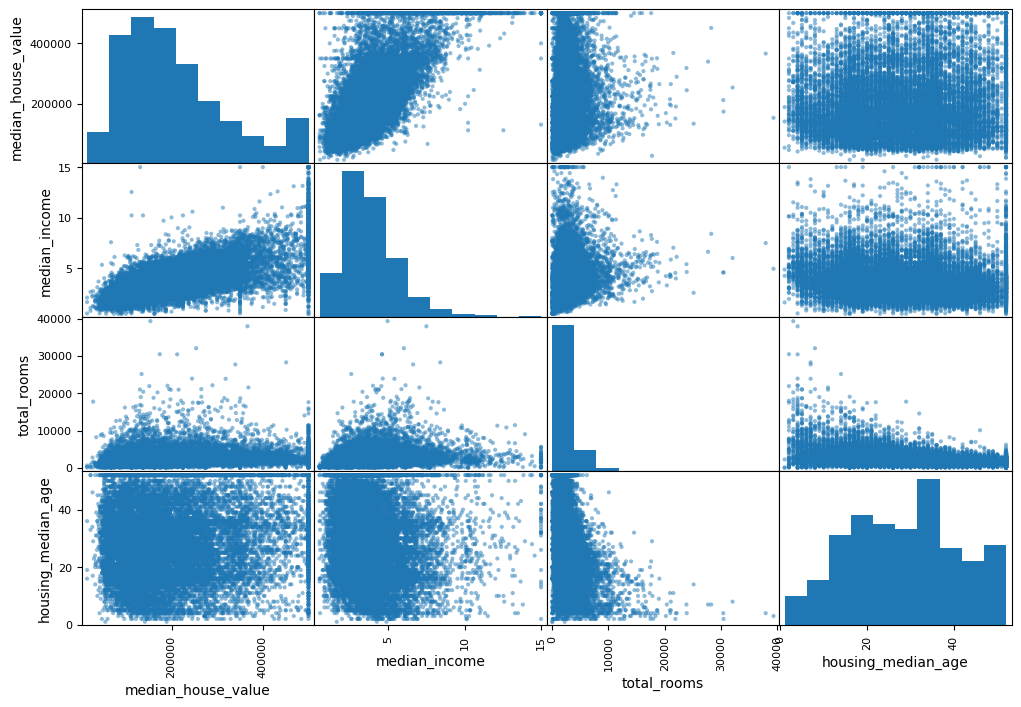

In [37]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

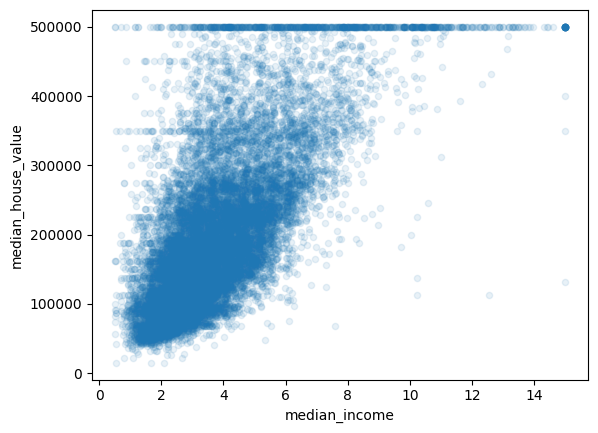

In [38]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [39]:
housing['Pokoje_na_rodzine']=housing['total_rooms']/housing['households']
housing['Sypialnie_na_pokoje']=housing['total_bedrooms']/housing['total_rooms']
housing['Populacja_na_rodzine']=housing['population']/housing['households']

In [40]:
corr_matrix=housing.corr()

In [41]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687151
Pokoje_na_rodzine       0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
Populacja_na_rodzine   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
Sypialnie_na_pokoje    -0.259952
Name: median_house_value, dtype: float64

In [42]:
housing=housing.drop(columns='Sypialnie_na_pokoje')

In [43]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687151
Pokoje_na_rodzine       0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
Populacja_na_rodzine   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
Name: median_house_value, dtype: float64

In [44]:
housing=strat_train_set.drop('median_house_value',axis=1)

In [45]:
housing_labels=strat_train_set['median_house_value'].copy()

In [46]:
median=housing['total_bedrooms'].median()
housing['total_bedrooms']=housing['total_bedrooms'].fillna(median,inplace=True)

C:\Users\grzeg\AppData\Local\Temp\ipykernel_5420\2031421469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing['total_bedrooms']=housing['total_bedrooms'].fillna(median,inplace=True)


In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      0 non-null      object 
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.3+ MB


In [48]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [49]:
housing_num=housing.drop('ocean_proximity',axis=1)

In [50]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [51]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,        nan,
       1164.     ,  408.     ,    3.54155])

In [52]:
dir(imputer)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_concatenate_indicator',
 '_concatenate_indicator_feature_names_out',
 '_dense_fit',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fit_dtype',
 '_fit_indicator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_html_repr',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_sparse_fit',
 '_transform_indicator',
 '_validate_

In [53]:
housing_num.median()

longitude             -118.51
latitude                34.26
housing_median_age       29.0
total_rooms            2119.0
total_bedrooms            NaN
population             1164.0
households              408.0
median_income         3.54155
dtype: object

In [54]:
X=imputer.transform(housing_num)

c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['total_bedrooms']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [55]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns)
housing_tr.head()

ValueError: Shape of passed values is (16512, 7), indices imply (16512, 8)

In [ ]:
#imputer(Strategy)

In [57]:
imputer.strategy

'median'

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
encoder=LabelEncoder()

In [60]:
housing_cat=housing['ocean_proximity']
housing_cat_encoded=encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1], shape=(16512,))

In [61]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [62]:
housing_cat_encoded.tolist()[:10]

[1, 4, 1, 4, 0, 3, 0, 0, 0, 0]

In [63]:
type(encoder)

sklearn.preprocessing._label.LabelEncoder

In [64]:
dir(encoder)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_html_repr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_params',
 'classes_',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'inverse_transform',
 'set_output',
 'set_params',
 'transform']

In [65]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [66]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [67]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [68]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer(sparse_output=True)
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16512 stored elements and shape (16512, 5)>

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix=3,4,5,6

In [70]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        Pokoje_na_rodzine=X[:,rooms_ix]/X[:,household_ix]
        Populacja_na_rodzine=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            Sypialnie_na_pokoje=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,Pokoje_na_rodzine,Populacja_na_rodzine,Sypialnie_na_pokoje]
        else:
            return np.c_[X,Pokoje_na_rodzine,Populacja_na_rodzine]
        

In [71]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)

In [72]:
housing_extra_attribs=attr_adder.transform(housing.values)

In [73]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], shape=(16512, 11), dtype=object)

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Imputer=SimpleImputer(strategy='median')

In [75]:
num_pipeline=Pipeline([
    ('imputer', Imputer),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [76]:
housing_num_tr=num_pipeline.fit_transform(housing_num)

c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['total_bedrooms']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

In [78]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [79]:
num_attribs=list(housing_num)
round(3.145,2)

3.15

In [80]:
cat_attribs=['ocean_proximity']

In [81]:
num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer', Imputer),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In [82]:
from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=None):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=None):
        return self.encoder.transform(x)

In [83]:
cat_pipeline=Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('cat_encoder', MyLabelBinarizer()),
])

In [84]:
from sklearn.linear_model import LinearRegression
Xarray = [[1], [2], [3], [4]]  # Cecha (X)
yarray = [1, 2, 3, 4]  # Etykiety (y)

# Tworzymy model regresji liniowej
model = LinearRegression()

# Dopasowujemy model do danych
model.fit(Xarray, yarray)

# Teraz model jest wytrenowany i możemy używać go do predykcji
print(model.predict([[5]]))

[5.]


In [85]:
from sklearn.pipeline import FeatureUnion

In [86]:
full_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
]
    )

In [87]:
housing_prepared=full_pipeline.fit_transform(housing)

c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [88]:
housing_prepared.shape

(16512, 15)

In [89]:
from sklearn.linear_model import LinearRegression   

In [90]:
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [91]:
some_data=housing.iloc[:5]

In [92]:
some_labels=housing_labels.iloc[:5]

some_data_prepared=full_pipeline.transform(some_data)

c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [93]:
print("Prognozy:", lin_reg.predict(some_data_prepared))

Prognozy: [ 81003.95839774 312374.5897056  155187.99231815 188055.12393848
 244936.66556907]


In [94]:
print("Etykiety:", list(some_labels))

Etykiety: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
housing_predictions=lin_reg.predict(housing_prepared)

In [97]:
lin_mse=mean_squared_error(housing_labels, housing_predictions)

In [98]:
lin_rmse=np.sqrt(lin_mse)

In [99]:
lin_rmse

np.float64(69050.45929727315)

In [100]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,None,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,None,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,None,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,None,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,None,1837.0,580.0,4.4964,<1H OCEAN


In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [103]:
housing_predictions=tree_reg.predict(housing_prepared)

In [104]:
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
scores=cross_val_score(tree_reg,housing_prepared, housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [107]:
def display_scores(scores):
    print("Wyniki:",scores)
    print("Srednia:",scores.mean())
    print("Odchylenie standardowe:",scores.std())

In [108]:
display_scores(tree_rmse_scores)

Wyniki: [67220.91901927 65768.32489033 66248.04082426 67406.09900868
 65263.45599358 71535.22387977 66971.77187005 66783.567964
 65968.28605685 67017.94971896]
Srednia: 67018.3639225748
Odchylenie standardowe: 1642.834492316165


In [109]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Wyniki: [72357.3663002  65509.74497492 69182.42378026 68892.45012944
 67930.84922402 73125.75245772 70410.8863789  69403.9657423
 66697.28493555 70577.25482446]
Srednia: 69408.79787477588
Odchylenie standardowe: 2234.6456512943155


In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
forest_reg=RandomForestRegressor()

In [122]:
forest_reg.fit(housing_prepared,housing_labels)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [124]:
forest_rmse=np.sqrt(mean_squared_error(housing_labels,forest_reg.predict(housing_prepared)))
forest_rmse

np.float64(18033.811950581694)

In [ ]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Wyniki: [49423.77347529 47180.41104256 45174.72882815 49789.70927984
 47273.48014753 48602.27681275 49375.39892065 47945.04976641
 46855.80292461 52451.37939875]
Srednia: 48407.201059655155
Odchylenie standardowe: 1900.92667171366


### Saving the models with results to dump

In [125]:
import joblib

In [130]:
joblib.dump((forest_reg,forest_rmse,forest_rmse_scores),'model_forest.pkl')

['model_forest.pkl']

In [129]:
joblib.dump((tree_reg,tree_rmse,tree_rmse_scores),'model_tree.pkl')

['model_tree.pkl']

### Regulating models with GridSearchCV

In [116]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

In [118]:
forest_reg=RandomForestRegressor()

In [119]:
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

In [132]:
grid_search.fit(housing_prepared,housing_labels)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,30


In [133]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [134]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=8, n_estimators=30)


In [135]:
cvres=grid_search.cv_results_

In [136]:
cvres

{'mean_fit_time': array([0.04573798, 0.1411047 , 0.43716373, 0.07326241, 0.25018482,
        0.72752481, 0.10687985, 0.34732189, 1.04117584, 0.13690872,
        0.45013566, 1.34571614, 0.07313833, 0.23455787, 0.0963407 ,
        0.31692667, 0.11974335, 0.3973516 ]),
 'std_fit_time': array([0.00158134, 0.00713168, 0.01295488, 0.00626104, 0.00190784,
        0.008315  , 0.00813402, 0.00672076, 0.00742609, 0.00573804,
        0.00948709, 0.00838645, 0.0063173 , 0.00693437, 0.0064695 ,
        0.00061149, 0.00406613, 0.00671879]),
 'mean_score_time': array([0.00192323, 0.01014714, 0.02267537, 0.00367408, 0.00358353,
        0.02354603, 0.        , 0.00648451, 0.01739497, 0.00324035,
        0.00731721, 0.0175252 , 0.00160537, 0.00429568, 0.        ,
        0.00368257, 0.00039997, 0.00655346]),
 'std_score_time': array([0.00016675, 0.00616012, 0.00735017, 0.00639638, 0.00653241,
        0.00744097, 0.        , 0.00794747, 0.00156866, 0.00648069,
        0.00780877, 0.0010556 , 0.00138751, 

In [137]:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63479.61839539293 {'max_features': 2, 'n_estimators': 3}
56408.72326230465 {'max_features': 2, 'n_estimators': 10}
53460.0401573486 {'max_features': 2, 'n_estimators': 30}
60878.07327469825 {'max_features': 4, 'n_estimators': 3}
53554.83323697814 {'max_features': 4, 'n_estimators': 10}
51211.0462027541 {'max_features': 4, 'n_estimators': 30}
58267.49569637892 {'max_features': 6, 'n_estimators': 3}
52259.73737475317 {'max_features': 6, 'n_estimators': 10}
50199.71817671078 {'max_features': 6, 'n_estimators': 30}
57754.973503966066 {'max_features': 8, 'n_estimators': 3}
52015.75903231156 {'max_features': 8, 'n_estimators': 10}
49408.60806341924 {'max_features': 8, 'n_estimators': 30}
62720.589728664956 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54856.34797173536 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59816.80003096086 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52909.743048966215 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### Regulating models with RandomizedSearchCV

In [139]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([8.97465538e-02, 8.69117634e-02, 4.09226597e-02, 1.85509704e-02,
       1.66522191e-02, 1.92375607e-02, 3.84135674e-01, 1.91928394e-02,
       2.17417741e-02, 1.37353626e-01, 9.17402133e-03, 1.51362268e-01,
       6.51006342e-05, 2.11426655e-03, 2.83870267e-03])

In [141]:
extra_attribs=['Pokoje_na_rodzine','Populacja_na_rodzine','Sypialnie_na_pokoje']
cat_one_hot_attribs=list(encoder.classes_)
attribs= num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attribs),reverse=True)

[(np.float64(0.3841356744611134), 'households'),
 (np.float64(0.15136226796664815), np.str_('<1H OCEAN')),
 (np.float64(0.13735362557669853), 'Populacja_na_rodzine'),
 (np.float64(0.08974655382202734), 'longitude'),
 (np.float64(0.08691176340398638), 'latitude'),
 (np.float64(0.040922659718869714), 'housing_median_age'),
 (np.float64(0.021741774142438695), 'Pokoje_na_rodzine'),
 (np.float64(0.019237560710388905), 'population'),
 (np.float64(0.019192839446348028), 'median_income'),
 (np.float64(0.018550970447293747), 'total_rooms'),
 (np.float64(0.016652219124167318), 'total_bedrooms'),
 (np.float64(0.009174021327296486), 'Sypialnie_na_pokoje'),
 (np.float64(0.0028387026681639194), np.str_('NEAR BAY')),
 (np.float64(0.002114266550335117), np.str_('ISLAND')),
 (np.float64(6.510063422417234e-05), np.str_('INLAND'))]

In [142]:
final_model=grid_search.best_estimator_

X_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()
X_test_prepared=full_pipeline.transform(X_test)

final_predictions=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: [4]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\grzeg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


np.float64(46691.20456900729)